<a href="https://colab.research.google.com/github/adlerviton/Mini_project_9/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newtons_divided_diff(x,y):
    # Compute coefficients for an (n-1)th degree interpolating polynomial using Newton's Divided difference formula
    # Inputs:
    # x = [x1, x2, ..., xn]: x-coordinates (distinct)
    # y = [y1, y2, ..., yn]: y-coordinates
    # Output: c = coefficients of interpolating polynomial. Arranged with constant term first, up to dth-order

    N = len(x) # Extract the number of points from the length of the arrays

    # Create a vector v of size NxN full of zeros
    v = np.zeros([N,N])
    v[:,0] = np.transpose(y)

    for i in range(1,N): # column i

        for j in range(0,N-i): # fill in column from top to bottom

            v[j,i] = (v[j+1,i-1] - v[j,i-1])/( x[j+i] - x[j])

    c = v[0,:]

    return c

In [3]:
def nested_poly(d,c,x,xcoord):
    # Form the interpolating polynomial
    # Inputs:
    # d - degree of the polynomial
    # c - coefficients. len(c) = d+1. Arranged with constant term first, up to dth-order term
    # x - values at which to evaluate the polynomial
    # (optional) xcoord = [x1, x2, ..., xn]. len(xcoord) = d


    y = c[d]

    for k in range(d,0,-1):

        y = y*(x-xcoord[k-1]) + c[k-1]


    return y

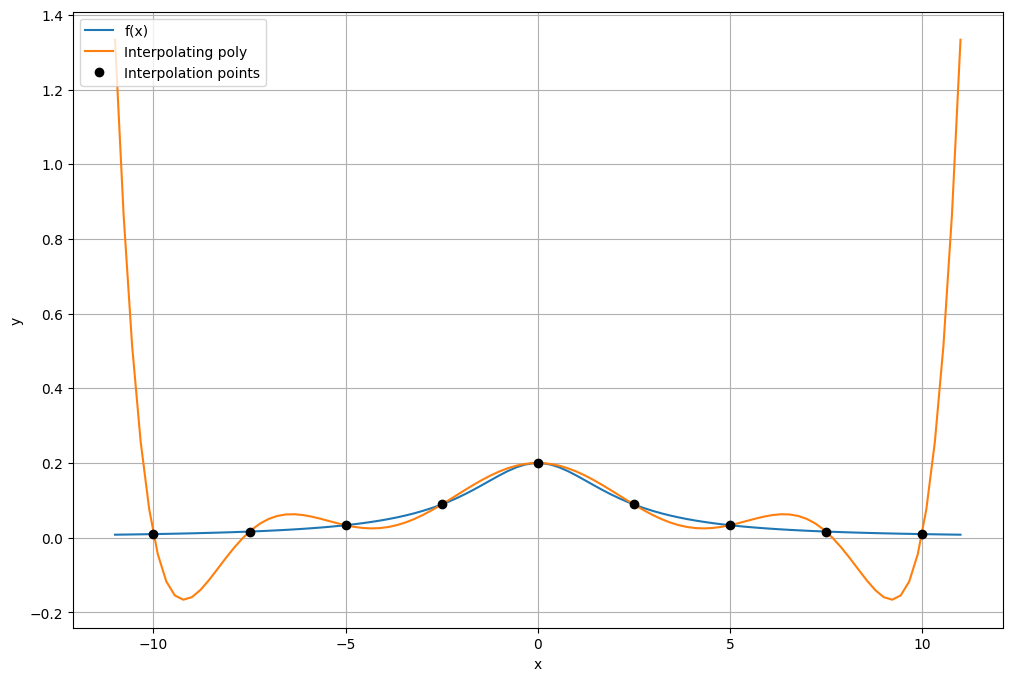

In [4]:
# Compute the dth degree polynomial interpolant of f(x) = exp(x) using the interpolation points x0 in the interval [a,b]

d = 8
a = -10
b = 10
x0 = np.linspace(a,b,d+1) # Interpolation points

f = lambda x: 1/((x**2)+5)

# Grid points to evaluate the interpolating polynomial and f(x) at
# Extend the interval slightly outside [a,b]
x = np.linspace(a-1,b+1,100)

c = newtons_divided_diff(x0,f(x0)) # Coefficients for interpolating polynomial
y = nested_poly(d,c,x,x0)  # Evaluate the polynomial at the points x.

# Plot f(x) and interpolating polynomial
plt.figure(figsize = (12, 8))
plt.plot(x,f(x),'-',label='f(x)')
plt.plot(x,y,'-',label='Interpolating poly')
plt.plot(x0,f(x0),'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

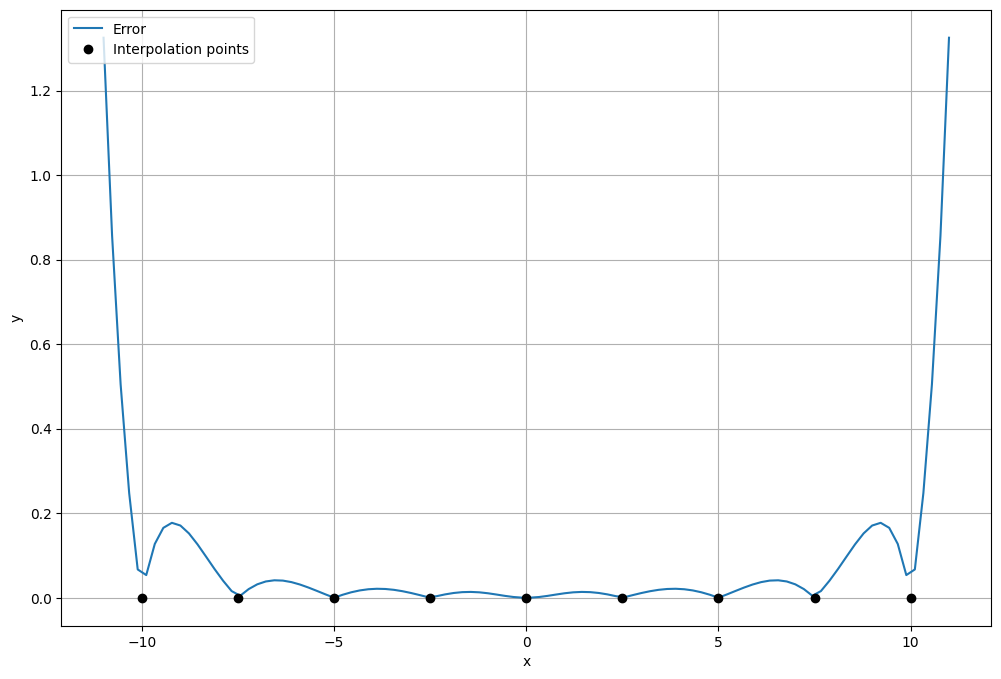

In [5]:
Err = f(x) - y
Error = np.abs(Err)
# Plot Error of the interpolating polynomial
plt.figure(figsize = (12, 8))
plt.plot(x,Error,'-',label='Error')
plt.plot(x0,np.zeros(len(x0)),'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [6]:
def poly_err(d,x,xcoord):
    # Error/remainder term in interpolation

    y = 1

    for k in range(d,0,-1):

        y = y*(x-xcoord[k-1])


    return y

(-10.0, 10.0)

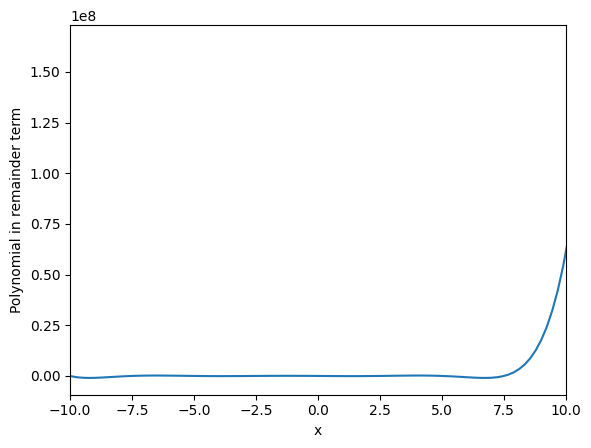

In [7]:
myPoly_err = poly_err(d,x,x0)


plt.figure()
plt.plot(x,myPoly_err,'-')
plt.xlabel('x')
plt.ylabel('Polynomial in remainder term')
plt.xlim([-10,10])

In [8]:
# Chebyshev nodes on interval [-10,10]

a = -10
b = 10
d = 8
idx = np.arange(1,d+2,1)

cheby_nodes = 0.5*(b-a)*np.cos( ((2*idx-1)*np.pi) /(2*d+1)) + 0.5*(a+b)

print(cheby_nodes.size)

c_cheby = newtons_divided_diff(cheby_nodes,f(cheby_nodes)) # Coefficients for interpolating polynomial
y = nested_poly(d,c_cheby,x,cheby_nodes)
print(cheby_nodes)
print(c_cheby)
print(f(cheby_nodes))

9
[  9.829731     8.50217136   6.02634636   2.7366299   -0.92268359
  -4.45738356  -7.39008917  -9.32472229 -10.        ]
[ 9.84023285e-03 -2.33403263e-03  5.82566223e-04 -2.21871213e-04
 -3.07798899e-05  2.26285716e-06  9.66041376e-07  1.50998097e-07
  1.85900468e-08]
[0.00984023 0.0129388  0.0242032  0.08006954 0.17090088 0.04021189
 0.01677475 0.01087542 0.00952381]


(-10.0, 10.0)

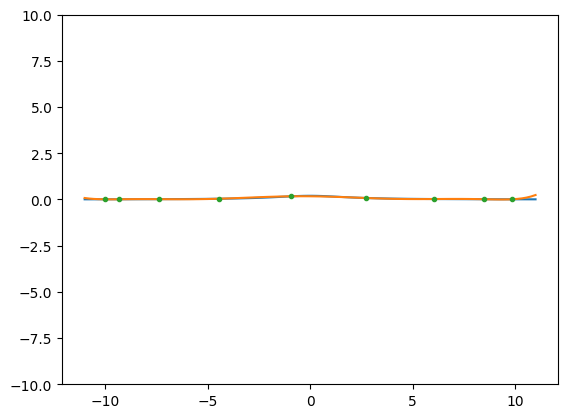

In [9]:
plt.figure()
plt.plot(x,f(x),'-',label='f(x)')
plt.plot(x,y,'-',label='Interpolating poly')
plt.plot(cheby_nodes,f(cheby_nodes),'.')
plt.ylim([-10,10])

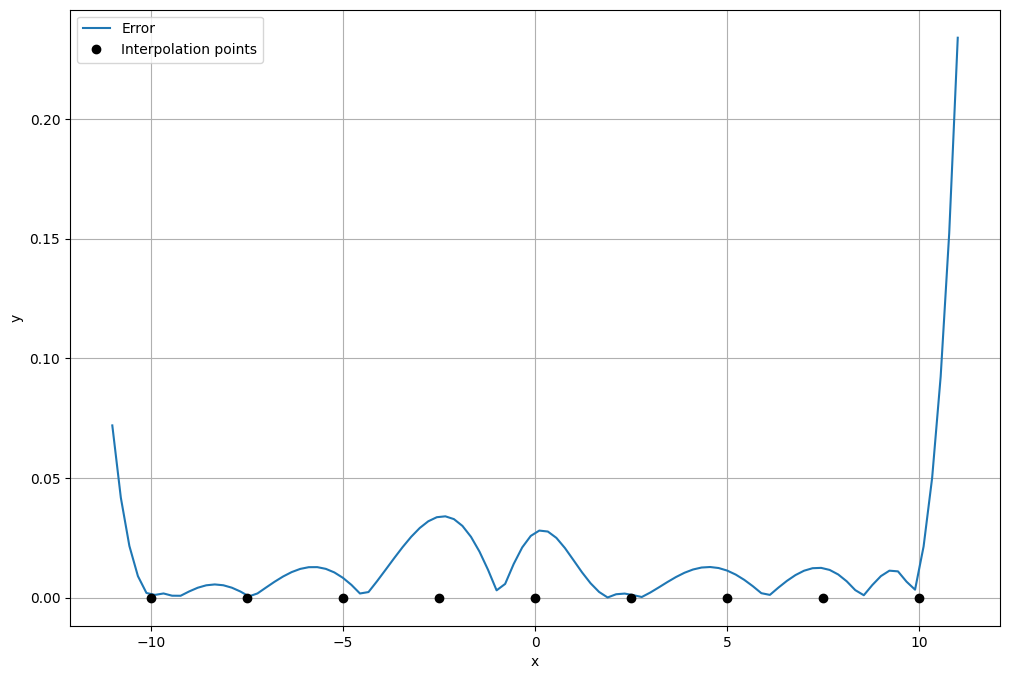

In [10]:
Err = f(x)-y
Error = np.abs(Err)
# Plot Error of the interpolating polynomial
plt.figure(figsize = (12, 8))
plt.plot(x,Error,'-',label='Error')
plt.plot(x0,np.zeros(len(x0)),'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

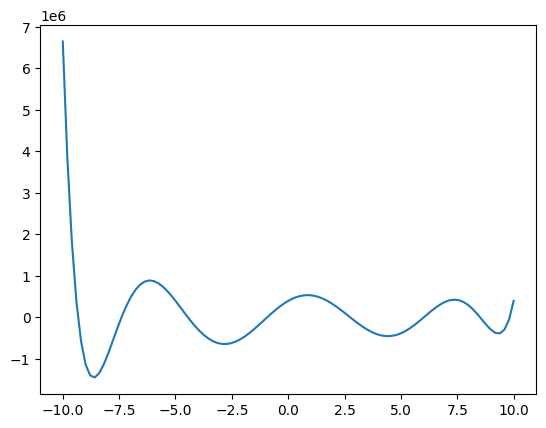

In [11]:
x = np.linspace(-10,10,100)
cheby_err = poly_err(d,x,cheby_nodes)

plt.figure()
plt.plot(x,cheby_err)

In [ ]:

d = 12
x0 = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022] # Interpolation points

y0 = [23.65,23.42,23.03,23.48,23.54,23.99,24.22,24.44,24.92,25.03,21.99,23.83,24.48]

# Grid points to evaluate the interpolating polynomial and f(x) at
# Extend the interval slightly outside [a,b]
x = np.linspace(2009,2023,100)

c = newtons_divided_diff(x0,y0) # Coefficients for interpolating polynomial
y = nested_poly(d,c,x,x0)  # Evaluate the polynomial at the points x.

# Plot f(x) and interpolating polynomial
plt.figure(figsize = (12, 8))
plt.plot(x,y,'-',label='Interpolating poly')
plt.plot(x0,y0,'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='lower left')
plt.show()


In [ ]:

d = 6
x0 = [2010,2012,2014,2016,2018,2020,2022] # Interpolation points

y0 = [23.65,23.03,23.54,24.22,24.92,21.99,24.48]

# Grid points to evaluate the interpolating polynomial and f(x) at
# Extend the interval slightly outside [a,b]
x = np.linspace(2009,2023,100)

c = newtons_divided_diff(x0,y0) # Coefficients for interpolating polynomial
y = nested_poly(d,c,x,x0)  # Evaluate the polynomial at the points x.

# Plot f(x) and interpolating polynomial
plt.figure(figsize = (12, 8))
plt.plot(x,y,'-',label='Interpolating poly')
plt.plot(x0,y0,'ko',label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [ ]:
f = lambda x: np.exp(x)
x0=0
h = [10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9,10**-10]

error = np.zeros(10)
for i in range(10):
    df = (f(x0+h[i])-f(x0-h[i]))/(2*h[i])
    error[i]=np.log10(np.abs(df-1))

plt.figure(figsize = (12, 8))
plt.plot(np.log10(h),error,'ko',label='Error')
plt.xlabel('log(step size)')
plt.ylabel('log(Error)')
plt.grid()
plt.legend(loc='upper left')
plt.show()
print(error)

In [ ]:
f = lambda x: np.sin(x)

x = np.linspace(0,2*np.pi,20)
h = x[1]-x[0]

# Boundary left: one-sided difference formula
df = 0
# Interior Grid points: Three-point centered difference formula for approximate derivative df
df= np.append(df,(f(x[0:-2])+f(x[2:])-2*f(x[1:-1]))/(h**2))
# Boundary right: one-sided difference formula
df = np.append(df, 0)
plt.figure(figsize = (12, 8))
plt.plot(x,df,'ko',label='2nd derivative')
plt.xlabel('log(step size)')
plt.ylabel('log(Error)')
plt.grid()
plt.legend(loc='upper left')
plt.show()